<a href="https://colab.research.google.com/github/MilanSinghBisht/collab-works/blob/main/Logistic_Regression_on_(MNIST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense ,Flatten

In [5]:
((train_data , train_labels),(test_data,test_labels)) = tf.keras.datasets.mnist.load_data()

In [6]:
train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)

test_data = test_data/np.float32(255)
test_labels = test_labels.astype(np.int32)

In [7]:
#defining model right now making it a simple model
model = K.Sequential([
    Flatten(input_shape = (28,28)),
    Dense(10,activation = 'sigmoid')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),metrics=['accuracy'])
history = model.fit(x = train_data,y = train_labels,epochs = 50 , verbose = 1,validation_split = 0.2)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:708: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8018 - loss: 0.7745 - val_accuracy: 0.9153 - val_loss: 0.3164
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9088 - loss: 0.3284 - val_accuracy: 0.9208 - val_loss: 0.2866
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9189 - loss: 0.2918 - val_accuracy: 0.9242 - val_loss: 0.2754
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9198 - loss: 0.2803 - val_accuracy: 0.9252 - val_loss: 0.2716
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9240 - loss: 0.2723 - val_accuracy: 0.9255 - val_loss: 0.2658
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9254 - loss: 0.2633 - val_accuracy: 0.9272 - val_loss: 0.2671
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9266 - loss: 0.2598 - val_accuracy: 0.9277 - val_loss: 0.2642
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9278 - loss: 0.2595 - val_accurac

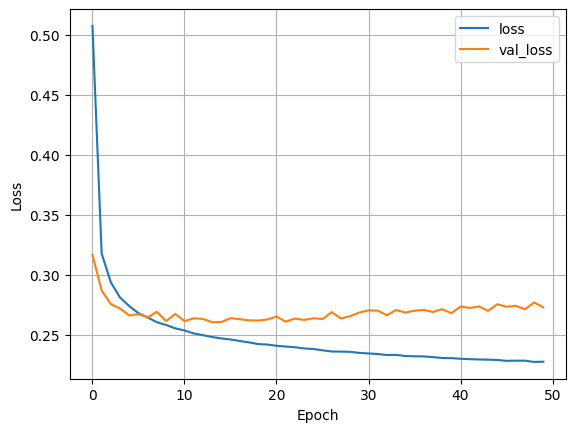

In [10]:
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label= 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [18]:

predictions = model.predict(test_data)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [19]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Pred {} Conf: {:2.0f}% True ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


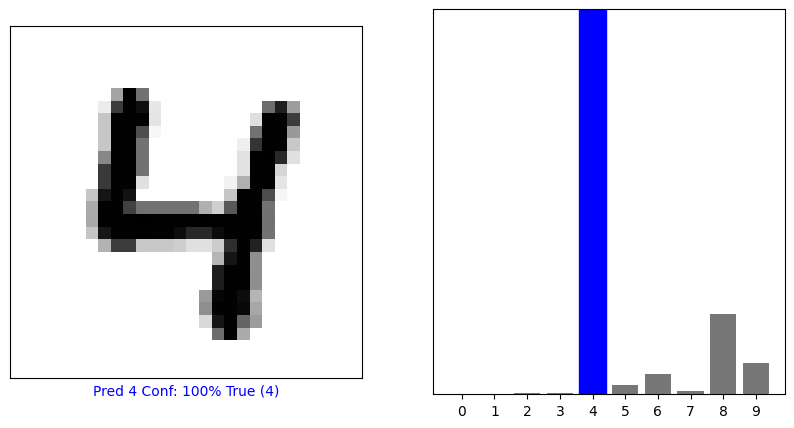

In [21]:
#using utility functions
predictions  = model.predict(test_data)
i = 56
plt.figure(figsize= (10,5))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels , test_data)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

In [22]:
better_model = K.Sequential([
    Flatten(input_shape = (28,28)),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
better_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
better_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])


In [24]:

history = better_model.fit(x=train_data,y=train_labels, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8661 - loss: 0.4806 - val_accuracy: 0.9588 - val_loss: 0.1505
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9617 - loss: 0.1342 - val_accuracy: 0.9670 - val_loss: 0.1127
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9752 - loss: 0.0870 - val_accuracy: 0.9718 - val_loss: 0.0986
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9808 - loss: 0.0647 - val_accuracy: 0.9722 - val_loss: 0.0941
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9861 - loss: 0.0496 - val_accuracy: 0.9745 - val_loss: 0.0880
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9889 - loss: 0.0377 - val_accuracy: 0.9747 - val_loss: 0.0823
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9921 - loss: 0.0277 - val_accuracy: 0.9755 - val_loss: 0.0878
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.9936 - loss: 0.0220

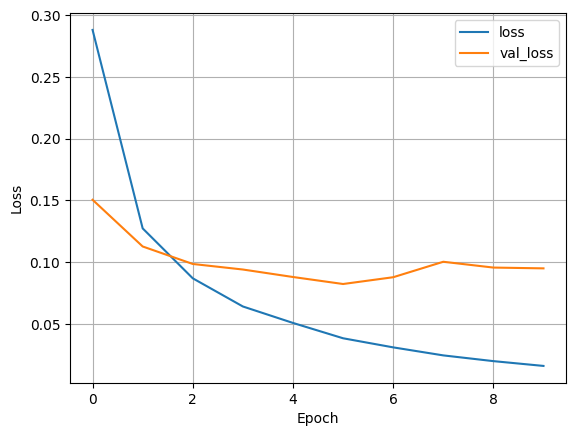

In [27]:
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


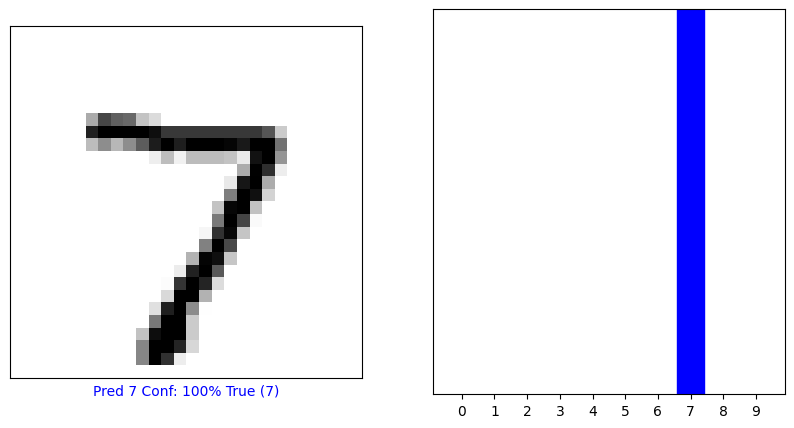

In [31]:
#predictions
predictions = better_model.predict(test_data)
i = 0
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [33]:
better_model.save("mnist_model.h5")
